<a href="https://colab.research.google.com/github/lakshh670/100_days_of_DeepLearning/blob/main/early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In this notebook we will implement back propagation for a regression problem from scratch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from matplotlib import pyplot as pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [ ]:
x,y=make_circles(noise=0.1,random_state=1)


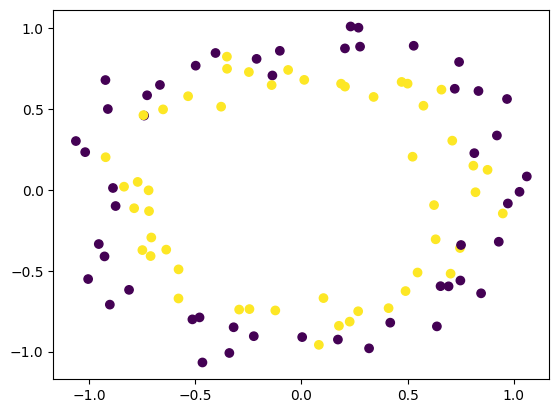

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## Model without early stopping

In [ ]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3500)

Streaming output truncated to the last 5000 lines.
Epoch 1001/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8680 - loss: 0.2739 - val_accuracy: 0.8500 - val_loss: 0.3498
Epoch 1002/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9031 - loss: 0.2474 - val_accuracy: 0.8500 - val_loss: 0.3498
Epoch 1003/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8992 - loss: 0.2582 - val_accuracy: 0.8500 - val_loss: 0.3471
Epoch 1004/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8859 - loss: 0.2592 - val_accuracy: 0.8500 - val_loss: 0.3454
Epoch 1005/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9211 - loss: 0.2392 - val_accuracy: 0.8500 - val_loss: 0.3471
Epoch 1006/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9133 - loss: 0.2544 - val_accuracy: 0.8500 - val_loss: 0.3467
Epoch 1007/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9109 - loss: 0.2474 - val_accuracy: 0.8500 - val_loss: 0.3472
Epoch 1008/3500
3/3 ━━━━━━━━━━━━━━━━━━━

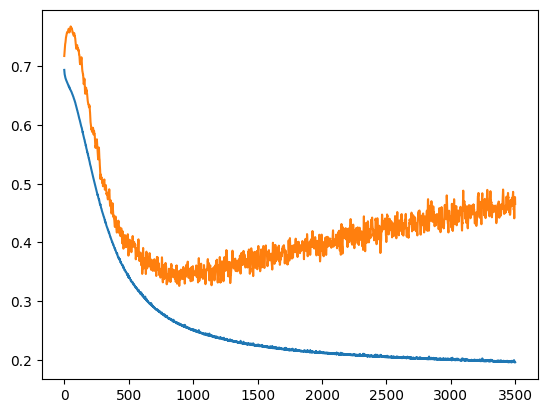

In [25]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
# We can see that after a certain number of epochs, the loss on test data started increasing

## Model with Early Stopping

In [27]:
from keras.callbacks import EarlyStopping

In [28]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.4742 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6941
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5023 - loss: 0.6899 - val_accuracy: 0.4500 - val_loss: 0.7014
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5336 - loss: 0.6844 - val_accuracy: 0.4500 - val_loss: 0.7079
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5086 - loss: 0.6857 - val_accuracy: 0.5000 - val_loss: 0.7125
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5586 - loss: 0.6811 - val_accuracy: 0.4000 - val_loss: 0.7184
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5609 - loss: 0.6856 - val_accuracy: 0.3000 - val_loss: 0.7233
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5930 - loss: 0.6810 - val_accuracy: 0.2500 - val_loss: 0.7286
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5766 - loss: 0.6815 - val_accuracy: 0.2500 - 

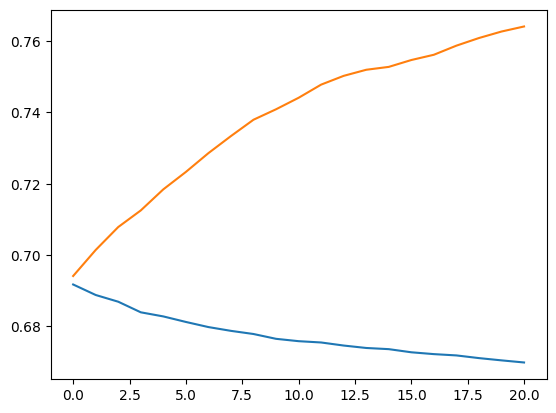

In [30]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')